#Функциональное программирование
Работа с функциями в математическом смысле слова "функция"

- В отличие от императивного - "сделать А, потом Б". Процедурные и ООП стили всё равно относятся к императивному подходу.
- Некоторые принципы функционального подхода помогают разработке архитектуры императивных программ.
- В чисто функциональных языках возможны оптимизации с учётом свойств чистых функции.

Основное свойство функционального программирования - __*чистота функций*__: результат вычисления зависит только от аргументов функции.

## Чистые функции

Чистые функции не производят никаких наблюдаемых побочных эффектов, только возвращают результат. Не меняют глобальных переменных, ничего никуда не посылают и не печатают, не трогают объектов, и так далее. Принимают данные, что-то вычисляют, учитывая только аргументы, и возвращают новые данные.

__Чистые функции:  
результат при одинаковых значеиях параметров всегда одинаковый и нет побочных эффектов__.

Плюсы:
* Легче читать и понимать код
* Легче тестировать (не надо создавать «условий»)
* Надежнее, потому что не зависят от «погоды» и состояния окружения, только от аргументов
* Можно запускать параллельно, можно кешировать результат

<u>Суть функционального программирования — это уничтожение побочных эффектов</u>

## Неизменяемые данные

Неизменяемые (иммутабельные) структуры данных - это коллекции, которые нельзя изменить. Примерно как числа. Число просто есть, его нельзя поменять. Также и неизменяемый массив — он такой, каким его создали, и всегда таким будет. Если нужно добавить элемент — придется создать новый массив.

Преимущества неизменяемых структур:
* Безопасно разделять ссылку между потоками
* Легко тестировать
* Легко отследить жизненный цикл (соответствует data flow)

В Python:

![](https://avatars.dzeninfra.ru/get-zen_doc/96780/pub_5cc7f26aeb28ac00aea474ed_5ccaed647ae9ed00b3a18c83/scale_1200)

## Функции - "объекты первого класса"
https://ru.wikipedia.org/wiki/Объект_первого_класса

В Python функции - это объекты. Их можно присваивать переменным, хранить их в структурах данных, передавать их в качестве аргументов другим функциям и возвращать как результат работы методов и функций.

In [ ]:
def f(x):
    return x**2

print(f.__name__)
print(f.__class__)
f

f
<class 'function'>


<function __main__.f>

После определения функция существует как экземпляр класса function.

Имя функции - всего лишь одна из переменных, ссылающихся на неё.

In [ ]:
v = f
print('name: ', v.__name__)

v(2)

name:  f


4

In [ ]:
del f

In [ ]:
try:
  print(f(2))
except Exception as e:
  print(e)

name 'f' is not defined


In [ ]:
v(2)

4

функции могут храниться в структурах данных

In [ ]:
import numpy as np


funcs = [v, np.sqrt, np.arange]
funcs

[<function __main__.f>, <ufunc 'sqrt'>, <function numpy.arange>]

In [ ]:
for f in funcs:
    print(f, f(2))

<function f at 0x7f17f1c958c0> 4
<ufunc 'sqrt'> 1.4142135623730951
<built-in function arange> [0 1]


In [ ]:
funcs[1](2)

1.4142135623730951

## Функции высшего порядка

Функцию, принимающую другую функцию в качестве аргумента и/или возвращающую другую функцию, называют функцией высшего порядка:

```python
def f(x):
    return x + 3

def g(function, x):
    return function(x) * function(x)

print(g(f, 7))
```

## Анонимные функции

In [ ]:
L = lambda x: x**2
print(L.__name__)
L

<lambda>


<function __main__.<lambda>>

In [ ]:
3**2, v(3), L(3)

(9, 9, 9)

## Все функции чистые

Чистая функция: результат при одинаковых значеиях параметров всегда одинаковый и нет побочных эффектов.

Позволяет ввести ещё одно ограничение на синтаксис - переменные без возможности изменения их значения после создания.

В чисто функциональных языках - это важное ограничение. В python это не так.

Примеры не чистых функций:

In [ ]:
from random import random
random()

0.3659945954361097

In [ ]:
from datetime import datetime
datetime.now()

datetime.datetime(2022, 4, 14, 14, 7, 3, 297482)

In [ ]:
def dirty_square(x):
  print("this is a side effect too")
  return x**2
a = dirty_square(3)

this is a side effect too


In [ ]:
count = 0
def counter(n):
  global count
  count += n
  return count

print(counter(2))
print(counter(2))

2
4


# Рекурсия

В функциональных языках рекурсия обычно используется намного чаще, чем итерация (циклы).

**Рекурсивная функция** – это функция, которая вызывает сама себя, и при каждом очередном вызове использует данные, созданные во время предыдущего вызова.

**Стек** – это структура данных LIFO (last in, first out): информация последовательно добавляется в «стопку» , каждый новый объект помещается поверх предыдущего, а извлекаются объекты в обратном порядке, – начиная с верхнего.

Стек вызовов, в свою очередь, – это область памяти, в которой выполняются функции. При каждом вызове функции создается *фрейм* – фрагмент памяти, в котором содержится:
* информация о текущем состоянии выполнения функции;
* значения всех переменных, которые функция получила для обработки;
* локальные данные, созданные во время очередного вызова;
* сведения о строке программы, к которой нужно вернуться после выполнения функции.

Фреймы помещаются в стек вызовов и удаляются точно так же, сверху вниз. Рекурсивные функции при каждом новом вызове используют данные, созданные во время работы предыдущего вызова.

Неверное использование рекурсии приводит к переполнению стека (stack overflow).

Переполнить стек в опытных целях можно с помощью простейшей рекурсивной функции, которая бесконечно вызывает сама себя, но не возвращает никаких данных и не содержит никакого условия для прекращения своей работы:

```python     
def recursive():
    recursive()

recursive()
```
    
Интерпретатор Python автоматически отслеживает переполнение стека и после 1000 бесплодных вызовов завершает работу подобных функций с ошибкой:

```python
RecursionError: maximum recursion depth exceeded
```

При желании лимит на глубину рекурсии можно увеличить (
  ```python
  import sys
  sys.setrecursionlimit(10000)  # меняем лимит на глубину рекурсии
  ```
  ), но сделать его бесконечным, разумеется, нельзя – даже самый внушительный объем оперативной памяти в итоге окажется переполненным!

Чтобы стек вызовов не переполнялся, в каждой рекурсивной функции всегда должны быть предусмотрены два случая:

1. *Граничный*, при котором функция завершает работу и возвращает данные в основную программу.
2. *Рекурсивный*, при котором функция продолжает вызывать себя.


In [ ]:
def factorial(n):
  if n==0:  # Граничный случай
    return 1
  else:  # Рекурсивный случай
    return n * factorial(n - 1)

factorial(4)

24

In [ ]:
def factorial_tail(n, current_result=1):
  if n==0:
    return current_result
  else:
    return factorial_tail(n - 1, current_result*n)

factorial_tail(4)

24

0. factorial_tail(3, 1*4)
1. factorial_tail(2, 4*3)
2. factorial_tail(1, 12*2)
3. factorial_tail(0, 24*1) = 24

In [ ]:
def factorial_loop(n):
  f = 1
  for i in range(1, n+1):
    f *= i
  return f
factorial_loop(4)

24

In [ ]:
n = 500
%timeit factorial(n)
%timeit factorial_tail(n)
%timeit factorial_loop(n)

358 µs ± 39 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
306 µs ± 40.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
84.9 µs ± 10.9 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


__Вывод:__ Рекурсивные функции работают медленнее обычных, поэтому их стоит применять только тогда, когда решить задачу без рекурсии сложно или время обработки данных в цикле заметно превышает время на вызов функции.

In [ ]:
def recursive_double_list(a):
  if len(a) == 0:
    return []
  else:
    return [a[0]*2] + recursive_double_list(a[1:])

recursive_double_list([4, 5, 6])

[8, 10, 12]

## Мемоизация

Если применение рекурсии при решении задачи неизбежно, есть простой способ ускорить выполнение функции – для этого используют декоратор `@lru_cache()` модуля `functools`:

In [ ]:
import functools

@functools.lru_cache()
def factorial_tail(n, current_result=1):
  if n > 0:  # одно и то же условие проверяет и граничный, и рекурсивный случаи сразу
    return factorial_tail(n - 1, current_result*n)
  return current_result

n = 500
%timeit factorial_tail(n)

135 ns ± 41.1 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


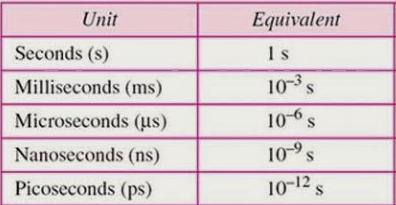

## Измерение производительности кода

In [ ]:
from time import sleep

print('%time:')
%time sleep(0.1)

print('\n%timeit:')
%timeit sleep(0.1)

%time:
CPU times: user 294 µs, sys: 0 ns, total: 294 µs
Wall time: 100 ms

%timeit:
100 ms ± 268 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Декоратор

Функция, принимающая на вход одну функцию и возвращающая функцию. Так она "декорирует" её работу.

*Напоминание синтаксиса Python*: `*args` и `**kwargs` позволяют функции принимать необязательные аргументы

In [ ]:
def uppercase(func):
    def wrapper(*args, **kwargs):
        original_result = func(*args, **kwargs)
        modified_result = original_result.upper()
        return modified_result
    return wrapper

@uppercase
def third_f():
    return 'hello world'

third_f()

'HELLO WORLD'

Декораторы часто применяют для уменьшения количества служебного кода. Хотя они являются функциями высшего уровня, они часто используются чтобы добавить к функции побочные эффекты.

In [ ]:
l = [x**2 for x in range(5) if x]
l

[0, 1, 4, 9, 16]

# Встроенные в Python __Map__, __Filter__ и __Reduce__
являются парадигмами функционального программирования. Они позволяют писать более простой и короткий код без необходимости беспокоиться о таких сложностях, как циклы и ветвления.

По сути, эти три функции позволяют вам применять функцию ко многим итерациям за один полный цикл.

```map``` и ```filter``` встроены в Python (в модуле __builtins__) и не требуют импорта.

```reduce```, однако, необходимо импортировать, поскольку начиная с 3 версии python он находится в модуле __functools__.

# Map
Принимает функцию и набор данных.

Выполняет функцию на каждом элементе данных и добавляет возвращаемое значение в новую коллекцию.

Возвращает новую коллекцию.

In [ ]:
name_lengths = map(len, ['Маша', 'Ира', 'Илларион'])
list(name_lengths)

[4, 3, 8]

In [ ]:
numbers = [0, 1, 2, 3, 4]
squares = map(lambda x: x**2, numbers)  # lambda - анонимная функция
list(squares)

[0, 1, 4, 9, 16]

In [ ]:
fruit = ["Apple", "Banana", "Pear", "Apricot", "Orange"]

map_object = map(lambda s: s[0] == "A", fruit)

list(map_object)

[True, False, False, True, False]

## Сравним нефункциональный и функциональный подходы

__µs__ - микросекунда  
__ms__ - миллисекунда

### Нефункциональный

In [ ]:
%%time

items = [1, 2, 3, 4, 5]
squared = []
for i in items:
    squared.append(i**2)
print(squared)

[1, 4, 9, 16, 25]
CPU times: user 850 µs, sys: 0 ns, total: 850 µs
Wall time: 860 µs


### Функциональный:

In [ ]:
%%time

items = [1, 2, 3, 4, 5]
squared = list(map(lambda x: x**2, items))

print(squared)

[1, 4, 9, 16, 25]
CPU times: user 88 µs, sys: 2 µs, total: 90 µs
Wall time: 96.3 µs


### Нефункциональный

In [ ]:
%%time

import random


names = ['Маша', 'Ира', 'Илларион']
code_names = ['Шпунтик', 'Винтик', 'Фунтик']

for i in range(len(names)):
  names[i] = random.choice(code_names)

print(names)

['Фунтик', 'Винтик', 'Фунтик']
CPU times: user 192 µs, sys: 0 ns, total: 192 µs
Wall time: 202 µs


### Функциональный:

In [ ]:
%%time

import random

names = ['Маша', 'Ира', 'Илларион']
code_names = ['Шпунтик', 'Винтик', 'Фунтик']

print(list(map(lambda x: random.choice(code_names), names)))

['Винтик', 'Винтик', 'Фунтик']
CPU times: user 123 µs, sys: 0 ns, total: 123 µs
Wall time: 128 µs


### Ещё пример

In [ ]:
def multiply(x):
    return (x*x)
  
def add(x):
    return (x+x)

funcs = [multiply, add]
for i in range(5):
    value = list(map(lambda x: x(i), funcs))
    print(value)

[0, 0]
[1, 2]
[4, 4]
[9, 6]
[16, 8]


## Упражнение
Перепишите этот код через ```map```.
```python
names = ['Маша', 'Ира', 'Илларион']

for i in range(len(names)):
  names[i] = hash(names[i])

print(names)
```

# Filter

In [ ]:
number_list = range(-5, 5)
print(list(number_list))

less_than_zero = list(filter(lambda x: x < 0, number_list))
print(less_than_zero)

[-5, -4, -3, -2, -1, 0, 1, 2, 3, 4]
[-5, -4, -3, -2, -1]


In [ ]:
def starts_with_A(s):
    return s[0] == "A"

fruit = ["Apple", "Banana", "Pear", "Apricot", "Orange"]
filter_object = filter(starts_with_A, fruit)

list(filter_object)

['Apple', 'Apricot']

In [ ]:
fruit = ["Apple", "Banana", "Pear", "Apricot", "Orange"]
filter_object = filter(lambda s: s[0] == "A", fruit)

list(filter_object)

['Apple', 'Apricot']

# Reduce
Принимает на вход функцию и набор данных.

Применяет скользящие вычисления к последовательным парам значений в наборе данных.

Возвращает новый набор данных.

In [ ]:
from functools import reduce

sum = reduce(
    lambda y, x: y + x,
    [0, 1, 2, 3, 4]
)  # x - число, y - аккумулятор (значение, которое возвращает lambda на предыдущем пункте; на первой итерации y = первому эл-ту (0))
sum

10

Вычисления происходят в следующем порядке:
```(((0+1)+2)+3)+4```


## Сравним нефункциональный и функциональный подходы

### Нефункциональный:

In [ ]:
%%time

product = 1
l = [1, 2, 3, 4]
for num in l:
    product = product * num

print(product)

24
CPU times: user 1.58 ms, sys: 18 µs, total: 1.59 ms
Wall time: 1.6 ms


### Функциональный

In [ ]:
%%time

from functools import reduce

product = reduce((lambda x, y: x * y), [1, 2, 3, 4])
print(product)

24
CPU times: user 676 µs, sys: 951 µs, total: 1.63 ms
Wall time: 1.51 ms


### Нефункциональный:

In [ ]:
%%time

sentences = ['капитан джек воробей',
             'капитан дальнего плавания',
             'ваша лодка готова, капитан']

capitain_count = 0

for sentence in sentences:
  capitain_count += sentence.count('капитан')

print(capitain_count)

3
CPU times: user 1.58 ms, sys: 0 ns, total: 1.58 ms
Wall time: 2.74 ms


### Функциональный:

In [ ]:
%%time


sentences = ['капитан джек воробей',
             'капитан дальнего плавания',
             'ваша лодка готова, капитан']

capitain_count = reduce(lambda a, x: a + x.count('капитан'),
                        sentences,
                        0)  # это начальное значение a, потому что оно не может быть вычислено из кол-ва повторений в первой строке
print(capitain_count)

3
CPU times: user 111 µs, sys: 15 µs, total: 126 µs
Wall time: 96.3 µs


## Ещё пара примеров

In [ ]:
from functools import reduce

def add(x, y):
    return x + y

l = [2, 4, 7, 3]
print(reduce(add, l))

16


In [ ]:
from functools import reduce

l = [2, 4, 7, 3]
print(reduce(lambda x, y: x + y, l))

print("With an initial value: " + str(reduce(lambda x, y: x + y, l, 10)))

16
With an initial value: 26


Вычисления происходят в следующем порядке: ```(((10+2)+4)+7)+3```

# Zip

In [ ]:
names = ['Петя', 'Маша', 'Катя']
code_names = ['Шпунтик', 'Винтик', 'Фунтик']

list(zip(names, code_names))

[('Петя', 'Шпунтик'), ('Маша', 'Винтик'), ('Катя', 'Фунтик')]

# Enumerate

In [ ]:
print([x for x in enumerate("abcd")])

[(0, 'a'), (1, 'b'), (2, 'c'), (3, 'd')]


# Sorted

In [ ]:
sorted('avdsdf')

['a', 'd', 'd', 'f', 's', 'v']

In [ ]:
list_of_tuples = [x for x in enumerate("dcba")]

sorted(list_of_tuples, key=lambda x: x[1])

[(3, 'a'), (2, 'b'), (1, 'c'), (0, 'd')]

# Домашнее задание
0. Сделать [Упражнение](https://colab.research.google.com/drive/1t2XwA5BgUHICt2JcE9X1kJsuhejqiWMH#scrollTo=UflPofno_z6s)
1. Напишите "наивную" рекуррентную функцию вычисления n-го [числа Фибоначчи](https://ru.wikipedia.org/wiki/%D0%A7%D0%B8%D1%81%D0%BB%D0%B0_%D0%A4%D0%B8%D0%B1%D0%BE%D0%BD%D0%B0%D1%87%D1%87%D0%B8).
2. Напишите рекуррентную функцию вычисления списка чисел Фибоначчи (от 0-го до n-го) по данному n
3. Нарисуйте график роста времени работы этих функций по мере увеличения n.
4. Напишите декоратор: функцию высшего порядка `my_timeit(func)`, результат которой - функция подсчёта времени работы func для разных входных значений, и который можно применить к `plot_discrete`
```python
@my_timeit
def plot_discrete():
```
5. Перепишите код, используя ``map``:
```python
persons = ['alfred', 'tabitha', 'william', 'arla']
uppered_persons = []
for person in persons:
    persons_ = person.upper()
    uppered_persons.append(persons_)    
print(uppered_persons)
```
6. Есть список:
```python
a = [1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89]
```
Выведите все элементы, которые меньше 5, используя ``filter`` (``filter`` принимает функцию и коллекцию, возвращает коллекцию элементов, для которых функция возвращает ``True``).
7. **``map`` + ``filter`` + ``reduce``:**  
С помощью анонимной функции извлеките из рандомного списка числа, делимые на 15, и сложите их.